In [1]:
import pandas as pd
import numpy as np
import investpy
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import scipy.optimize as optimize
import datetime as dt
import yfinance as yf
yf.pdr_override()
import time
import random


In [2]:
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from scipy.stats import norm

# Get the data

In [3]:
file = pd.read_csv('nasdaq.csv')
file

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$150.82,5.390,3.706%,2.614818e+12,United States,1980.0,106882922,Technology,Computer Manufacturing
1,ADBE,Adobe Inc. Common Stock,$392.23,8.310,2.165%,1.795629e+11,United States,1986.0,4006918,Technology,Computer Software: Prepackaged Software
2,ADI,Analog Devices Inc. Common Stock,$179.30,2.710,1.535%,9.079211e+10,United States,NaN,4201586,Technology,Semiconductors
3,ADSK,Autodesk Inc. Common Stock,$228.22,6.030,2.714%,4.924246e+10,United States,NaN,1823242,Technology,Computer Software: Prepackaged Software
4,AMAT,Applied Materials Inc. Common Stock,$124.26,5.250,4.411%,1.047609e+11,United States,1972.0,11171502,Technology,Semiconductors
5,AMD,Advanced Micro Devices Inc. Common Stock,$88.31,3.670,4.336%,1.437126e+11,United States,NaN,97272451,Technology,Semiconductors
6,ANSS,ANSYS Inc. Common Stock,$282.50,8.110,2.956%,2.460921e+10,United States,1996.0,559976,Technology,Computer Software: Prepackaged Software
7,AVGO,Broadcom Inc. Common Stock,$605.77,3.020,0.501%,2.531429e+11,United States,2009.0,2412430,Technology,Semiconductors
8,AZPN,Aspen Technology Inc. Common Stock,$204.14,-2.680,-1.296%,1.322241e+10,United States,NaN,299855,Technology,EDP Services
9,BSY,Bentley Systems Incorporated Class B Common Stock,$42.27,1.680,4.139%,1.219036e+10,United States,2020.0,1313708,Technology,Retail: Computer Software & Peripheral Equipment


In [4]:
tickers = file['Symbol'].tolist()

In [5]:
tickers

['AAPL',
 'ADBE',
 'ADI',
 'ADSK',
 'AMAT',
 'AMD',
 'ANSS',
 'AVGO',
 'AZPN',
 'BSY',
 'CDNS',
 'COIN',
 'CRWD',
 'DDOG',
 'DOCU',
 'ENPH',
 'ENTG',
 'FSLR',
 'FTNT',
 'GFS',
 'GOOG',
 'GOOGL',
 'INTU',
 'JKHY',
 'KLAC',
 'LRCX',
 'LSCC',
 'MCHP',
 'MDB',
 'META',
 'MPWR',
 'MRVL',
 'MSFT',
 'MTCH',
 'MU',
 'NTAP',
 'NVDA',
 'OKTA',
 'ON',
 'PANW',
 'PCTY',
 'PTC',
 'QCOM',
 'SNPS',
 'SPLK',
 'SSNC',
 'SWKS',
 'TTD',
 'TTWO',
 'TXN',
 'VRSN',
 'WDAY',
 'WDC',
 'ZBRA',
 'ZI',
 'ZM',
 'ZS']

In [6]:
start = dt.datetime(2018, 1, 1)
data_stocks=pdr.get_data_yahoo(tickers,start)

[*********************100%***********************]  57 of 57 completed


In [7]:
close=data_stocks[['Close']]

In [8]:
close

Close                                                  \
                  AAPL        ADBE         ADI        ADSK        AMAT   
Date                                                                     
2018-01-02   43.064999  177.699997   90.279999  107.120003   53.040001   
2018-01-03   43.057499  181.039993   91.400002  109.379997   53.980000   
2018-01-04   43.257500  183.220001   91.300003  112.070000   54.290001   
2018-01-05   43.750000  185.339996   91.669998  110.839996   54.599998   
2018-01-08   43.587502  185.039993   91.830002  111.419998   55.919998   
...                ...         ...         ...         ...         ...   
2023-01-27  145.929993  370.709991  170.830002  210.880005  112.500000   
2023-01-30  143.000000  363.420013  168.929993  209.119995  108.199997   
2023-01-31  144.289993  370.339996  171.470001  215.160004  111.489998   
2023-02-01  145.429993  383.920013  176.589996  222.190002  119.010002   
2023-02-02  150.820007  392.230011  179.300003  228.220001  124.260002   

                                                                      ...  \
                  AMD        ANSS        AVGO        AZPN        BSY  ...   
Date                                                                  ...   
2018-01-02  10.980000  148.550003  267.010010   66.169998        NaN  ...   
2018-01-03  11.550000  151.419998  269.929993   66.169998        NaN  ...   
2018-01-04  12.120000  151.820007  270.019989   70.019997        NaN  ...   
2018-01-05  11.880000  152.449997  271.619995   70.779999        NaN  ...   
2018-01-08  12.280000  153.710007  272.269989   73.110001        NaN  ...   
...               ...         ...         ...         ...        ...  ...   
2023-01-27  75.400002  266.670013  590.989990  190.750000  39.160000  ...   
2023-01-30  72.449997  261.559998  581.450012  195.710007  38.799999  ...   
2023-01-31  75.150002  266.359985  585.010010  198.750000  39.049999  ...   
2023-02-01  84.639999  274.390015  602.750000  206.820007  40.590000  ...   
2023-02-02  88.309998  282.500000  605.770020  204.139999  42.270000  ...   

                                                                       \
                  TTD        TTWO         TXN        VRSN        WDAY   
Date                                                                    
2018-01-02   4.641000  112.879997  105.570000  109.470001  103.400002   
2018-01-03   4.791000  113.879997  108.430000  110.900002  105.169998   
2018-01-04   4.765000  114.019997  108.290001  111.470001  109.250000   
2018-01-05   4.835000  116.910004  109.120003  113.000000  109.320000   
2018-01-08   4.787000  117.370003  109.639999  114.309998  109.940002   
...               ...         ...         ...         ...         ...   
2023-01-27  51.950001  114.279999  175.240005  218.520004  177.660004   
2023-01-30  49.220001  112.660004  173.130005  216.190002  176.479996   
2023-01-31  50.700001  113.230003  177.210007  218.050003  181.429993   
2023-02-01  52.310001  112.250000  182.100006  220.729996  185.330002   
2023-02-02  57.009998  114.720001  184.720001  222.369995  190.979996   

                                                                     
                  WDC        ZBRA         ZI         ZM          ZS  
Date                                                                 
2018-01-02  81.379997  103.709999        NaN        NaN         NaN  
2018-01-03  82.669998  105.769997        NaN        NaN         NaN  
2018-01-04  82.169998  107.860001        NaN        NaN         NaN  
2018-01-05  82.690002  109.540001        NaN        NaN         NaN  
2018-01-08  81.440002  110.629997        NaN        NaN         NaN  
...               ...         ...        ...        ...         ...  
2023-01-27  44.970001  317.100006  27.610001  74.150002  127.519997  
2023-01-30  44.240002  309.029999  27.389999  73.500000  122.599998  
2023-01-31  43.950001  316.179993  28.230000  75.000000  124.160004  
2023-02-01  43.320000  328.630005  28.

In [9]:
close.columns=close.columns.droplevel() #droplevel get rid of close 

In [10]:
close

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,BSY,...,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZI,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,43.064999,177.699997,90.279999,107.120003,53.040001,10.980000,148.550003,267.010010,66.169998,NaN,...,4.641000,112.879997,105.570000,109.470001,103.400002,81.379997,103.709999,NaN,NaN,NaN
2018-01-03,43.057499,181.039993,91.400002,109.379997,53.980000,11.550000,151.419998,269.929993,66.169998,NaN,...,4.791000,113.879997,108.430000,110.900002,105.169998,82.669998,105.769997,NaN,NaN,NaN
2018-01-04,43.257500,183.220001,91.300003,112.070000,54.290001,12.120000,151.820007,270.019989,70.019997,NaN,...,4.765000,114.019997,108.290001,111.470001,109.250000,82.169998,107.860001,NaN,NaN,NaN
2018-01-05,43.750000,185.339996,91.669998,110.839996,54.599998,11.880000,152.449997,271.619995,70.779999,NaN,...,4.835000,116.910004,109.120003,113.000000,109.320000,82.690002,109.540001,NaN,NaN,NaN
2018-01-08,43.587502,185.039993,91.830002,111.419998,55.919998,12.280000,153.710007,272.269989,73.110001,NaN,...,4.787000,117.370003,109.639999,114.309998,109.940002,81.440002,110.629997,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,145.929993,370.709991,170.830002,210.880005,112.500000,75.400002,266.670013,590.989990,190.750000,39.160000,...,51.950001,114.279999,175.240005,218.520004,177.660004,44.970001,317.100006,27.610001,74.150002,127.519997
2023-01-30,143.000000,363.420013,168.929993,209.119995,108.199997,72.449997,261.559998,581.450012,195.710007,38.799999,...,49.220001,112.660004,173.130005,216.190002,176.479996,44.240002,309.029999,27.389999,73.500000,122.599998
2023-01-31,144.289993,370.339996,171.470001,215.160004,111.489998,75.150002,266.359985,585.010010,198.750000,39.049999,...,50.700001,113.230003,177.210007,218.050003,181.429993,43.950001,316.179993,28.230000,75.000000,124.160004


## Cleaning Data

In [11]:
nulls_percent_df = pd.DataFrame(close.isna().sum()/len(close)*100).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,AAPL,0.000000
1,ADBE,0.000000
2,ADI,0.000000
3,ADSK,0.000000
4,AMAT,0.000000
5,AMD,0.000000
6,ANSS,0.000000
7,AVGO,0.000000
8,AZPN,0.000000
9,BSY,53.551913


In [12]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
9,BSY,53.551913
11,COIN,64.402810
12,CRWD,28.259173
13,DDOG,33.645589
14,DOCU,6.245121
19,GFS,75.175644
54,ZI,47.540984
55,ZM,25.370804
56,ZS,3.981265


In [13]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>5]
columns_above_threshold['column_name']

9      BSY
11    COIN
12    CRWD
13    DDOG
14    DOCU
19     GFS
54      ZI
55      ZM
Name: column_name, dtype: object

In [14]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['BSY', 'COIN', 'CRWD', 'DDOG', 'DOCU', 'GFS', 'ZI', 'ZM']


In [15]:
close = close.drop(drop_columns_list,axis=1)

In [16]:
close

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,43.064999,177.699997,90.279999,107.120003,53.040001,10.980000,148.550003,267.010010,66.169998,42.049999,...,40.610001,98.430000,4.641000,112.879997,105.570000,109.470001,103.400002,81.379997,103.709999,NaN
2018-01-03,43.057499,181.039993,91.400002,109.379997,53.980000,11.550000,151.419998,269.929993,66.169998,42.930000,...,41.049999,99.930000,4.791000,113.879997,108.430000,110.900002,105.169998,82.669998,105.769997,NaN
2018-01-04,43.257500,183.220001,91.300003,112.070000,54.290001,12.120000,151.820007,270.019989,70.019997,43.580002,...,41.459999,100.769997,4.765000,114.019997,108.290001,111.470001,109.250000,82.169998,107.860001,NaN
2018-01-05,43.750000,185.339996,91.669998,110.839996,54.599998,11.880000,152.449997,271.619995,70.779999,43.990002,...,41.849998,101.230003,4.835000,116.910004,109.120003,113.000000,109.320000,82.690002,109.540001,NaN
2018-01-08,43.587502,185.039993,91.830002,111.419998,55.919998,12.280000,153.710007,272.269989,73.110001,44.919998,...,42.209999,101.250000,4.787000,117.370003,109.639999,114.309998,109.940002,81.440002,110.629997,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,145.929993,370.709991,170.830002,210.880005,112.500000,75.400002,266.670013,590.989990,190.750000,185.029999,...,59.650002,111.160004,51.950001,114.279999,175.240005,218.520004,177.660004,44.970001,317.100006,127.519997
2023-01-30,143.000000,363.420013,168.929993,209.119995,108.199997,72.449997,261.559998,581.450012,195.710007,180.740005,...,58.919998,108.580002,49.220001,112.660004,173.130005,216.190002,176.479996,44.240002,309.029999,122.599998
2023-01-31,144.289993,370.339996,171.470001,215.160004,111.489998,75.150002,266.359985,585.010010,198.750000,182.830002,...,60.349998,109.669998,50.700001,113.230003,177.210007,218.050003,181.429993,43.950001,316.179993,124.160004


## Analysis

### Generating Rnadom Uncorrelated Portfolios

In [17]:
returns_stocks=np.log(close).diff()
returns_stocks = returns_stocks.dropna()
returns_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-19,-0.015397,-0.015054,-0.006928,-0.010664,-0.015941,-0.003493,-0.008150,-0.039699,-0.003593,-0.009373,...,-0.009361,-0.011820,-0.040707,-0.026348,-0.019374,-0.013593,-0.027949,-0.031394,-0.024363,-0.167881
2018-03-20,-0.000342,0.033504,-0.008485,0.002157,0.012401,-0.028396,0.003208,-0.010630,0.004211,-0.007088,...,0.011071,-0.002381,0.024868,0.007056,0.014725,0.007858,0.011183,0.004932,0.017362,0.085158
2018-03-21,-0.022915,-0.012703,0.000970,0.006959,0.025833,0.013411,0.005544,0.014907,-0.003839,0.010222,...,0.008694,-0.005516,-0.008634,-0.004858,-0.007520,-0.004804,0.002626,-0.008038,0.007838,0.022780
2018-03-22,-0.014231,-0.028301,-0.024655,-0.030945,-0.030402,-0.031577,-0.024331,-0.009927,-0.020051,-0.025351,...,-0.013833,-0.030230,-0.035850,-0.022597,-0.044611,-0.015774,-0.016702,-0.019738,-0.036703,-0.041050
2018-03-23,-0.023429,-0.025257,-0.031870,-0.026136,-0.062641,-0.026000,-0.029176,-0.004485,-0.019944,-0.027384,...,-0.016545,-0.037072,-0.021881,-0.026623,-0.024750,-0.026186,-0.027662,-0.087959,-0.014128,-0.013500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,0.013591,0.013279,0.000527,0.011542,-0.027010,0.003188,0.000338,-0.012761,0.005046,-0.003238,...,0.022206,-0.007707,0.043271,0.021135,0.006527,0.002887,-0.006844,0.027276,0.018557,0.018441
2023-01-30,-0.020282,-0.019861,-0.011185,-0.008381,-0.038972,-0.039911,-0.019348,-0.016274,0.025670,-0.023458,...,-0.012314,-0.023483,-0.053982,-0.014277,-0.012114,-0.010720,-0.006664,-0.016366,-0.025779,-0.039346
2023-01-31,0.008980,0.018862,0.014924,0.028474,0.029954,0.036590,0.018185,0.006104,0.015414,0.011497,...,0.023980,0.009989,0.029626,0.005047,0.023293,0.008567,0.027662,-0.006577,0.022873,0.012644


In [18]:
returns_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-19,-0.015397,-0.015054,-0.006928,-0.010664,-0.015941,-0.003493,-0.008150,-0.039699,-0.003593,-0.009373,...,-0.009361,-0.011820,-0.040707,-0.026348,-0.019374,-0.013593,-0.027949,-0.031394,-0.024363,-0.167881
2018-03-20,-0.000342,0.033504,-0.008485,0.002157,0.012401,-0.028396,0.003208,-0.010630,0.004211,-0.007088,...,0.011071,-0.002381,0.024868,0.007056,0.014725,0.007858,0.011183,0.004932,0.017362,0.085158
2018-03-21,-0.022915,-0.012703,0.000970,0.006959,0.025833,0.013411,0.005544,0.014907,-0.003839,0.010222,...,0.008694,-0.005516,-0.008634,-0.004858,-0.007520,-0.004804,0.002626,-0.008038,0.007838,0.022780
2018-03-22,-0.014231,-0.028301,-0.024655,-0.030945,-0.030402,-0.031577,-0.024331,-0.009927,-0.020051,-0.025351,...,-0.013833,-0.030230,-0.035850,-0.022597,-0.044611,-0.015774,-0.016702,-0.019738,-0.036703,-0.041050
2018-03-23,-0.023429,-0.025257,-0.031870,-0.026136,-0.062641,-0.026000,-0.029176,-0.004485,-0.019944,-0.027384,...,-0.016545,-0.037072,-0.021881,-0.026623,-0.024750,-0.026186,-0.027662,-0.087959,-0.014128,-0.013500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,0.013591,0.013279,0.000527,0.011542,-0.027010,0.003188,0.000338,-0.012761,0.005046,-0.003238,...,0.022206,-0.007707,0.043271,0.021135,0.006527,0.002887,-0.006844,0.027276,0.018557,0.018441
2023-01-30,-0.020282,-0.019861,-0.011185,-0.008381,-0.038972,-0.039911,-0.019348,-0.016274,0.025670,-0.023458,...,-0.012314,-0.023483,-0.053982,-0.014277,-0.012114,-0.010720,-0.006664,-0.016366,-0.025779,-0.039346
2023-01-31,0.008980,0.018862,0.014924,0.028474,0.029954,0.036590,0.018185,0.006104,0.015414,0.011497,...,0.023980,0.009989,0.029626,0.005047,0.023293,0.008567,0.027662,-0.006577,0.022873,0.012644


In [19]:
corr_stocks=returns_stocks.corr(method='pearson')

In [20]:
corr_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
AAPL,1.000000,0.685200,0.639138,0.620219,0.626993,0.568661,0.693018,0.648471,0.461792,0.666160,...,0.561116,0.702970,0.475728,0.446680,0.663501,0.614376,0.544389,0.470524,0.581195,0.404523
ADBE,0.685200,1.000000,0.638628,0.728821,0.607640,0.571768,0.779339,0.597202,0.471416,0.739384,...,0.597322,0.604102,0.558018,0.498003,0.640264,0.676221,0.689573,0.421020,0.577653,0.523895
ADI,0.639138,0.638628,1.000000,0.637655,0.793352,0.601298,0.703134,0.766069,0.447384,0.683878,...,0.627240,0.793239,0.484372,0.391677,0.861288,0.594434,0.539942,0.619588,0.587472,0.358277
ADSK,0.620219,0.728821,0.637655,1.000000,0.619240,0.570298,0.767494,0.613928,0.522056,0.691700,...,0.618499,0.615421,0.564840,0.440180,0.630537,0.601423,0.649079,0.498199,0.593704,0.485059
AMAT,0.626993,0.607640,0.793352,0.619240,1.000000,0.608933,0.670060,0.730858,0.444440,0.666076,...,0.552085,0.758384,0.481542,0.392148,0.791455,0.554686,0.519987,0.658201,0.590202,0.352491
AMD,0.568661,0.571768,0.601298,0.570298,0.608933,1.000000,0.609088,0.561835,0.433013,0.595288,...,0.469020,0.576440,0.509295,0.402853,0.611896,0.527461,0.503299,0.447899,0.515489,0.440880
ANSS,0.693018,0.779339,0.703134,0.767494,0.670060,0.609088,1.000000,0.655317,0.524962,0.793945,...,0.617546,0.680561,0.565456,0.483343,0.707130,0.704906,0.666700,0.460977,0.630877,0.530765
AVGO,0.648471,0.597202,0.766069,0.613928,0.730858,0.561835,0.655317,1.000000,0.404557,0.657268,...,0.592051,0.757590,0.462396,0.379353,0.743394,0.551704,0.516507,0.586979,0.547785,0.350283
AZPN,0.461792,0.471416,0.447384,0.522056,0.444440,0.433013,0.524962,0.404557,1.000000,0.489758,...,0.480753,0.420627,0.399594,0.336007,0.454761,0.488406,0.465606,0.398837,0.437415,0.339451
CDNS,0.666160,0.739384,0.683878,0.691700,0.666076,0.595288,0.793945,0.657268,0.489758,1.000000,...,0.579301,0.663161,0.547122,0.463594,0.690394,0.675499,0.625310,0.469579,0.577885,0.512324


In [21]:
upper_stocks=corr_stocks.where(np.triu(np.ones(corr_stocks.shape),k=1).astype(np.bool8))

/var/folders/_7/r8_t39mn1y9_vrqfwvk06l_w0000gn/T/ipykernel_37224/862718547.py:1: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  upper_stocks=corr_stocks.where(np.triu(np.ones(corr_stocks.shape),k=1).astype(np.bool8))


In [22]:
upper_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
AAPL,NaN,0.6852,0.639138,0.620219,0.626993,0.568661,0.693018,0.648471,0.461792,0.666160,...,0.561116,0.702970,0.475728,0.446680,0.663501,0.614376,0.544389,0.470524,0.581195,0.404523
ADBE,NaN,NaN,0.638628,0.728821,0.607640,0.571768,0.779339,0.597202,0.471416,0.739384,...,0.597322,0.604102,0.558018,0.498003,0.640264,0.676221,0.689573,0.421020,0.577653,0.523895
ADI,NaN,NaN,NaN,0.637655,0.793352,0.601298,0.703134,0.766069,0.447384,0.683878,...,0.627240,0.793239,0.484372,0.391677,0.861288,0.594434,0.539942,0.619588,0.587472,0.358277
ADSK,NaN,NaN,NaN,NaN,0.619240,0.570298,0.767494,0.613928,0.522056,0.691700,...,0.618499,0.615421,0.564840,0.440180,0.630537,0.601423,0.649079,0.498199,0.593704,0.485059
AMAT,NaN,NaN,NaN,NaN,NaN,0.608933,0.670060,0.730858,0.444440,0.666076,...,0.552085,0.758384,0.481542,0.392148,0.791455,0.554686,0.519987,0.658201,0.590202,0.352491
AMD,NaN,NaN,NaN,NaN,NaN,NaN,0.609088,0.561835,0.433013,0.595288,...,0.469020,0.576440,0.509295,0.402853,0.611896,0.527461,0.503299,0.447899,0.515489,0.440880
ANSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655317,0.524962,0.793945,...,0.617546,0.680561,0.565456,0.483343,0.707130,0.704906,0.666700,0.460977,0.630877,0.530765
AVGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404557,0.657268,...,0.592051,0.757590,0.462396,0.379353,0.743394,0.551704,0.516507,0.586979,0.547785,0.350283
AZPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.489758,...,0.480753,0.420627,0.399594,0.336007,0.454761,0.488406,0.465606,0.398837,0.437415,0.339451
CDNS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.579301,0.663161,0.547122,0.463594,0.690394,0.675499,0.625310,0.469579,0.577885,0.512324


In [23]:
upper_stocks=upper_stocks.unstack().dropna()

In [24]:
upper_stocks=upper_stocks.sort_values(ascending=False)

In [25]:
upper_stocks

GOOGL  GOOG    0.994763
LRCX   AMAT    0.920070
SNPS   CDNS    0.883861
LRCX   KLAC    0.882934
KLAC   AMAT    0.880774
                 ...   
ZS     JKHY    0.239725
       WDC     0.236847
TTWO   FSLR    0.234854
JKHY   FSLR    0.188868
       ENPH    0.173055
Length: 1176, dtype: float64

In [26]:
up_stocks = upper_stocks[:100]
up_stocks = [item for t in up_stocks.index for item in t]
down_stocks = upper_stocks[-100:]
down_stocks = [item for t in down_stocks.index for item in t]

In [27]:
up_stocks

['GOOGL',
 'GOOG',
 'LRCX',
 'AMAT',
 'SNPS',
 'CDNS',
 'LRCX',
 'KLAC',
 'KLAC',
 'AMAT',
 'TXN',
 'ADI',
 'MCHP',
 'ADI',
 'TXN',
 'MCHP',
 'ON',
 'MCHP',
 'SNPS',
 'ANSS',
 'MCHP',
 'AMAT',
 'MSFT',
 'GOOGL',
 'MSFT',
 'ADBE',
 'MSFT',
 'GOOG',
 'ON',
 'ADI',
 'MCHP',
 'LRCX',
 'SNPS',
 'INTU',
 'TXN',
 'SWKS',
 'CDNS',
 'ANSS',
 'SWKS',
 'MCHP',
 'AMAT',
 'ADI',
 'MCHP',
 'KLAC',
 'SWKS',
 'ADI',
 'MPWR',
 'ADI',
 'TXN',
 'AMAT',
 'ENTG',
 'AMAT',
 'MSFT',
 'INTU',
 'INTU',
 'ANSS',
 'MSFT',
 'ANSS',
 'MPWR',
 'MCHP',
 'KLAC',
 'ADI',
 'LRCX',
 'ADI',
 'TXN',
 'KLAC',
 'ANSS',
 'ADBE',
 'KLAC',
 'ENTG',
 'MPWR',
 'KLAC',
 'LRCX',
 'ENTG',
 'MU',
 'LRCX',
 'MU',
 'AMAT',
 'TXN',
 'MPWR',
 'MSFT',
 'AAPL',
 'TXN',
 'LRCX',
 'ANSS',
 'ADSK',
 'MPWR',
 'LRCX',
 'AVGO',
 'ADI',
 'MPWR',
 'AMAT',
 'SNPS',
 'MSFT',
 'SWKS',
 'MPWR',
 'WDC',
 'MU',
 'NVDA',
 'MPWR',
 'SWKS',
 'AMAT',
 'SWKS',
 'AVGO',
 'MRVL',
 'MPWR',
 'SNPS',
 'ADBE',
 'INTU',
 'ADBE',
 'MU',
 'MCHP',
 'SWKS',
 'LRCX',
 

In [28]:
down_stocks

['MU',
 'ENPH',
 'MDB',
 'ENPH',
 'ZBRA',
 'TTWO',
 'WDAY',
 'JKHY',
 'SPLK',
 'ENPH',
 'TTWO',
 'PCTY',
 'ZS',
 'TXN',
 'ZS',
 'TTWO',
 'TTWO',
 'ENTG',
 'MU',
 'MDB',
 'TTWO',
 'PTC',
 'TXN',
 'ENPH',
 'TTWO',
 'FTNT',
 'SSNC',
 'FSLR',
 'ON',
 'OKTA',
 'ZS',
 'MCHP',
 'ZBRA',
 'FSLR',
 'QCOM',
 'OKTA',
 'INTU',
 'FSLR',
 'FTNT',
 'ENPH',
 'ZS',
 'ADI',
 'NTAP',
 'META',
 'QCOM',
 'AZPN',
 'QCOM',
 'JKHY',
 'JKHY',
 'AMD',
 'ENPH',
 'AMD',
 'TTWO',
 'MCHP',
 'ZS',
 'AMAT',
 'ZBRA',
 'ENPH',
 'FSLR',
 'AAPL',
 'WDC',
 'PANW',
 'ZS',
 'AVGO',
 'WDC',
 'FSLR',
 'ZS',
 'LRCX',
 'MTCH',
 'AZPN',
 'QCOM',
 'FSLR',
 'FSLR',
 'AMD',
 'OKTA',
 'ENPH',
 'TTWO',
 'PANW',
 'GOOGL',
 'FSLR',
 'ZS',
 'SSNC',
 'ZS',
 'AZPN',
 'GOOG',
 'FSLR',
 'TTWO',
 'JKHY',
 'LSCC',
 'JKHY',
 'TTWO',
 'LSCC',
 'ZS',
 'QCOM',
 'TTD',
 'NTAP',
 'TTWO',
 'AZPN',
 'GOOGL',
 'ENPH',
 'OKTA',
 'MU',
 'QCOM',
 'ENPH',
 'GOOG',
 'ENPH',
 'TTWO',
 'MU',
 'ZS',
 'MU',
 'PANW',
 'JKHY',
 'VRSN',
 'ENPH',
 'MU',
 'JKHY',
 '

In [29]:
cagr=pd.DataFrame(index=close.index)

In [30]:
rdom_stocks=[]

In [31]:
for i in range(5): # cadas iteración va a ser una cartera
    randomstocks=list(set(random.sample(up_stocks,k=2)+random.sample(down_stocks,k=2)))
    while len(randomstocks)<4:# mientras la cartera sea menor a 6 acciones
         randomstocks=list(set(random.sample(up_stocks,k=2)+random.sample(down_stocks,k=2)))
    rdom_stocks.append(randomstocks)
    data=yf.download(randomstocks,'2018-01-01',progress=False)['Close']
    
    weights = [0.1]*len(randomstocks)
    
    returns = data.pct_change()
    returns = returns.dot(weights)
    cagr[i]=(1+returns).cumprod().fillna(1)
    print('Random',i,)

Random 0
Random 1
Random 2
Random 3
Random 4


In [140]:
cagr

,0,1,2,3,4
Date,,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-03,1.004115,1.000000,1.007058,1.000000,1.006215
2018-01-04,1.010415,1.000000,1.008473,1.000000,1.005934
2018-01-05,1.015422,1.000000,1.011276,1.000000,1.009908
2018-01-08,1.019578,1.000000,1.015336,1.000000,1.011408
...,...,...,...,...,...
2023-01-27,1.598397,1.818524,1.747949,1.452200,1.472495
2023-01-30,1.592188,1.798092,1.723897,1.439435,1.463311
2023-01-31,1.602147,1.814961,1.737786,1.445512,1.473649


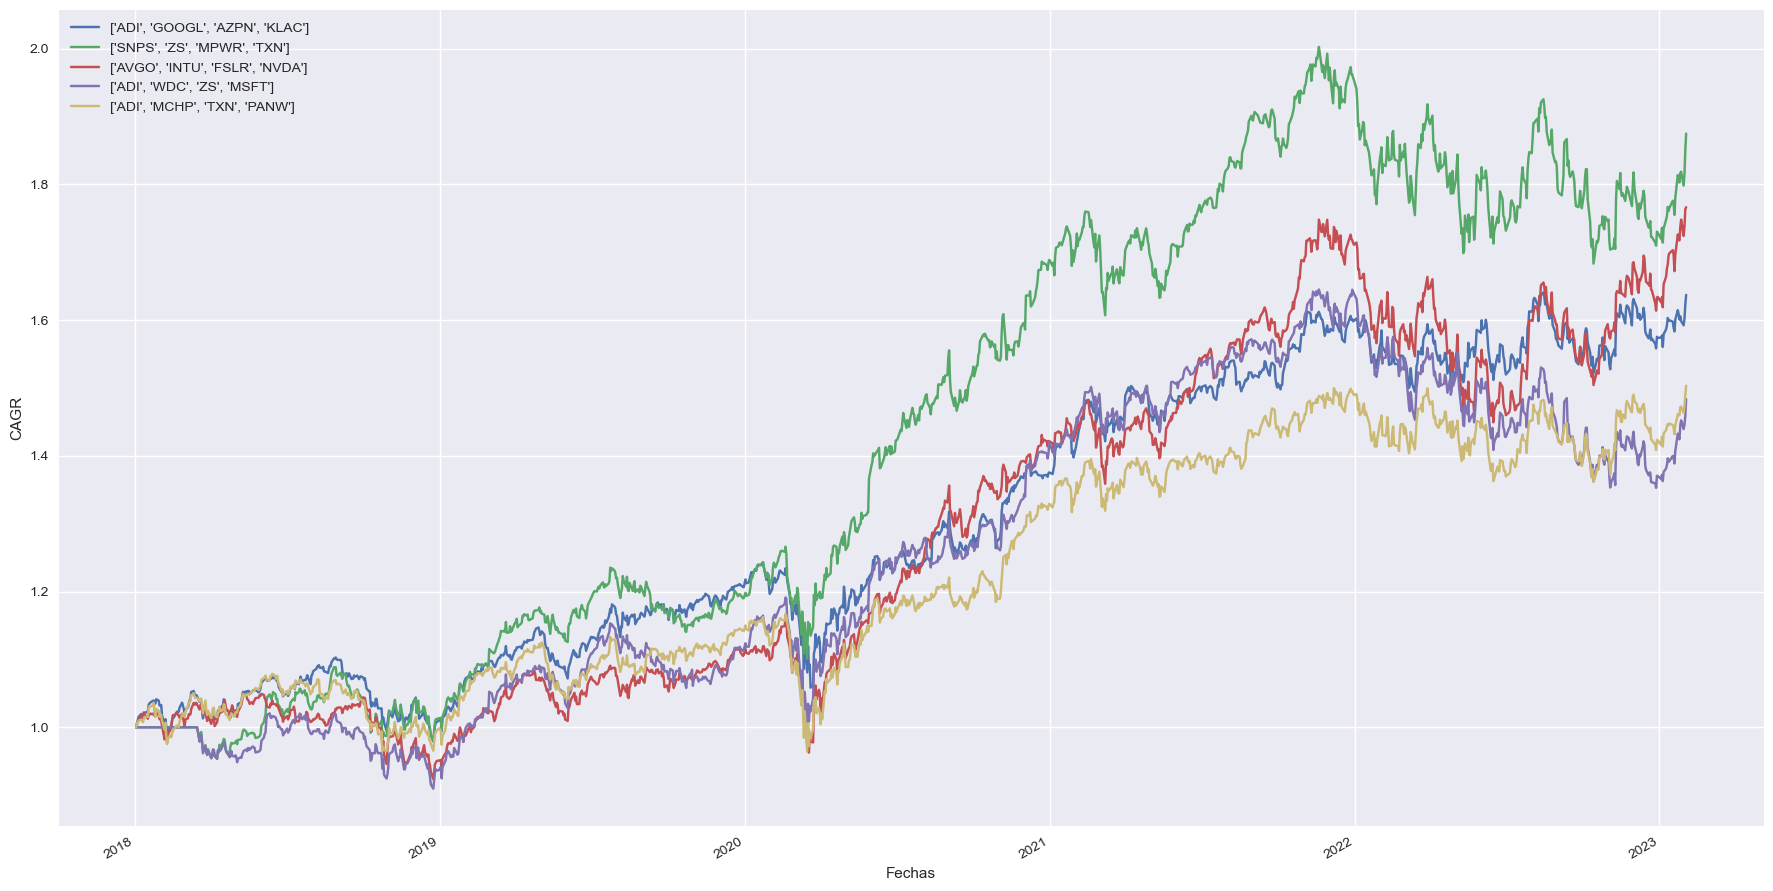

In [135]:
plt.style.use('seaborn')
cagr.plot(figsize=(22,12),ylabel="CAGR",xlabel="Fechas")
plt.legend(rdom_stocks)
plt.show()

### Markowitz

## Portfolio 1 

In [34]:
symbols=['ADI','MRVL','FSLR','MDB']
#symbols=['AAPL','MSFT','SPY','GLD']

#list_assets=['RCL','CPT','CLX','CPB','RF','USB']

In [35]:
assets=pdr.get_data_yahoo(symbols,start)

[*********************100%***********************]  4 of 4 completed


In [36]:
assets=pd.DataFrame(assets)[['Close']]

In [37]:
assets.columns=assets.columns.droplevel()

In [38]:
assets

,ADI,FSLR,MDB,MRVL
Date,,,,
2018-01-02,90.279999,70.430000,29.250000,22.200001
2018-01-03,91.400002,69.800003,29.150000,22.889999
2018-01-04,91.300003,69.139999,29.049999,23.410000
2018-01-05,91.669998,69.169998,29.049999,23.000000
2018-01-08,91.830002,69.620003,28.809999,23.170000
...,...,...,...,...
2023-01-27,170.830002,179.350006,224.009995,44.250000
2023-01-30,168.929993,170.779999,210.410004,41.990002
2023-01-31,171.470001,177.600006,214.210007,43.150002


In [39]:
assets.corr()

,ADI,FSLR,MDB,MRVL
ADI,1.000000,0.702186,0.880313,0.910639
FSLR,0.702186,1.000000,0.439285,0.524681
MDB,0.880313,0.439285,1.000000,0.933140
MRVL,0.910639,0.524681,0.933140,1.000000


<AxesSubplot:xlabel='Date'>

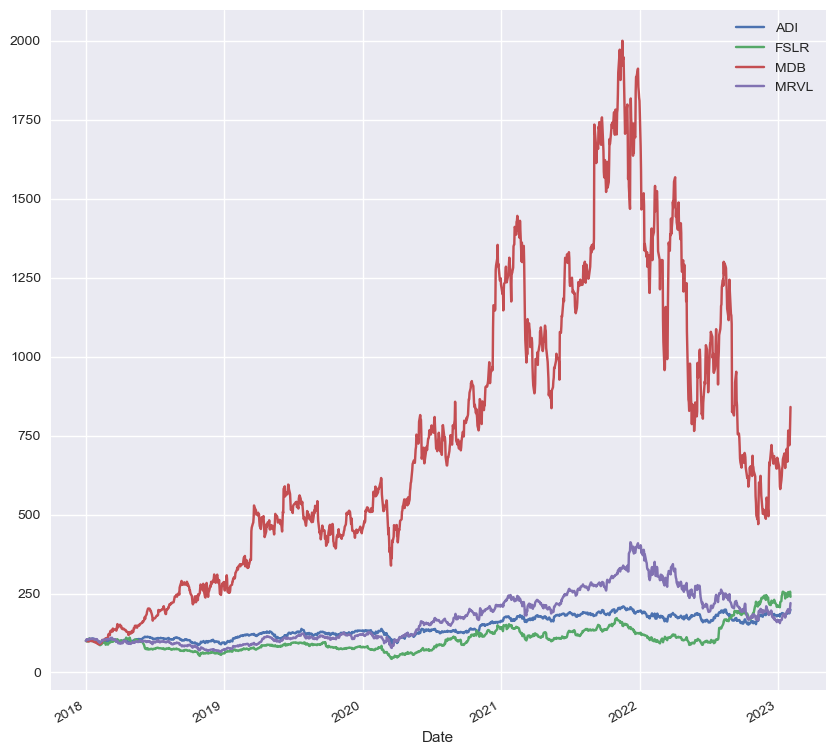

In [40]:
(assets/assets.iloc[0]*100).plot(figsize=(10,10))

In [42]:
rets = np.log(assets/assets.shift(1)).dropna()
rets

,ADI,FSLR,MDB,MRVL
Date,,,,
2018-01-03,0.012330,-0.008985,-0.003425,0.030608
2018-01-04,-0.001095,-0.009501,-0.003436,0.022463
2018-01-05,0.004044,0.000434,0.000000,-0.017669
2018-01-08,0.001744,0.006485,-0.008296,0.007364
2018-01-09,-0.002071,0.005729,-0.000694,-0.000864
...,...,...,...,...
2023-01-27,0.000527,0.022099,0.073047,-0.003159
2023-01-30,-0.011185,-0.048963,-0.062633,-0.052424
2023-01-31,0.014924,0.039158,0.017899,0.027251


In [43]:
rets.std()

ADI     0.022137
FSLR    0.030034
MDB     0.042509
MRVL    0.029996
dtype: float64

In [44]:
rets.sum()

ADI     0.686144
FSLR    0.873325
MDB     2.128883
MRVL    0.786818
dtype: float64

In [45]:
rets.mean()*252

ADI     0.135085
FSLR    0.171936
MDB     0.419124
MRVL    0.154905
dtype: float64

In [230]:
rets.cov()*252

,ADI,FSLR,MDB,MRVL
ADI,0.123488,0.069964,0.102832,0.122633
FSLR,0.069964,0.227307,0.094675,0.099407
MDB,0.102832,0.094675,0.455373,0.156643
MRVL,0.122633,0.099407,0.156643,0.226744


In [46]:
num_stocks=len(symbols)

In [47]:
weights=np.random.rand(num_stocks)
weights/=np.sum(weights)

In [48]:
weights

array([0.00997262, 0.4713368 , 0.4300457 , 0.08864488])

In [234]:
# calculo del retorno

return_sample=np.sum(weights*rets.mean())*252
return_sample

0.22905549339581768

In [235]:
# calculo de la varianza

variance_sample=np.dot(weights.T,np.dot(rets.cov()*252,weights))

In [236]:
volatility_sample=np.sqrt(variance_sample)
volatility_sample

0.3980257096629652

In [49]:
def port_ret(weights):
    return np.sum(weights*rets.mean())*252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))

prets = []
pvols =[]

for p in range(10000):
    weights=np.random.random(num_stocks)
    weights/=np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

prets=np.array(prets)
pvols=np.array(pvols)
 

In [179]:
# retornos_portfolio = []
# volatilidades_portfolio=[]

# for x in range(10000):
#     weights_sample=np.random.random(num_stocks)
#     weights_sample/=np.sum(weights_sample)
#     retornos_portfolio.append(np.sum(weights_sample*return_assets.mean())*252)
#     volatilidades_portfolio.append(np.sqrt(np.dot(weights_sample.T,np.dot(return_assets.cov()*252,weights_sample))))

In [ ]:
retornos_portfolio=np.array(retornos_portfolio)
retornos_portfolio

In [ ]:
volatilidades_portfolio=np.array(volatilidades_portfolio)
volatilidades_portfolio

In [ ]:
portfolios = pd.DataFrame({'Retorno':retornos_portfolio,'Volatilidad':volatilidades_portfolio})

In [ ]:
portfolios['sharpe']=portfolios['Retorno']/portfolios['Volatilidad']

In [ ]:
portfolios['sharpe'].max()

In [ ]:
portfolios[portfolios['sharpe']==0.7029231386476266]

In [ ]:
portfolios.plot(x="Volatilidad",y='Retorno',kind='scatter',figsize=(10,6))
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')




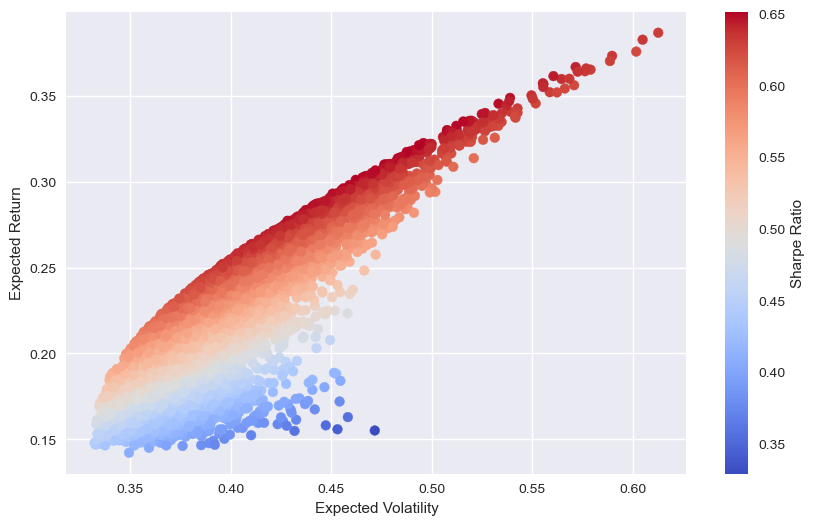

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c= prets/pvols, marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

In [ ]:
#t is clear by inspection of Figure 13-13 that not all weight distributions perform well
#when measured in terms of mean and volatility. For example, for a fixed risk level of,
#say, 15%, there are multiple portfolios that all show different returns. As an investor,
#one is generally interested in the maximum return given a fixed risk level or the mini‐
#mum risk given a fixed return expectation. This set of portfolios then makes up the
#so-called efficient frontier. This is derived later in this section.

In [51]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [52]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [53]:
bnds = tuple((0, 1) for x in range(num_stocks))

In [54]:
eweights = np.array(num_stocks * [1. / num_stocks,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [55]:
min_func_sharpe(eweights)

-0.5777872978718765

In [56]:
opts = sco.minimize(min_func_sharpe, eweights,
method='SLSQP', bounds=bnds,
constraints=cons)

In [57]:
opts

     fun: -0.652046388438399
     jac: array([ 1.85668468e-05,  8.68067145e-05, -4.41521406e-05,  7.02264383e-02])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.67850730e-01, 2.56736192e-01, 5.75413078e-01, 5.68121938e-17])

In [58]:
opts['x'].round(3) # optimal portfolio return

array([0.168, 0.257, 0.575, 0.   ])

In [59]:
port_ret(opts['x']).round(3) # resulting portfolio return

0.308

In [60]:
port_vol(opts['x']).round(3) # resulting portfolio volatility

0.472

In [61]:
port_ret(opts['x'])/port_vol(opts['x']) # maximum sharpe

0.652046388438399

In [62]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [63]:
optv

     fun: 0.3311682428499086
     jac: array([0.33111156, 0.3312807 , 0.33168253, 0.35550364])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([7.25784004e-01, 2.48577122e-01, 2.56388737e-02, 2.14672030e-17])

In [64]:
optv['x'].round(3)

array([0.726, 0.249, 0.026, 0.   ])

In [65]:
port_vol(optv['x'].round(3))

0.33149971314383414

In [66]:
port_ret(optv['x'].round(3))

0.15178072366730236

In [67]:
port_ret(optv['x']) / port_vol(optv['x'])

0.4575543843132695

In [256]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [257]:
bnds = tuple((0, 1) for x in weights)

In [258]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 2.28 s, sys: 25.9 ms, total: 2.31 s
Wall time: 2.33 s


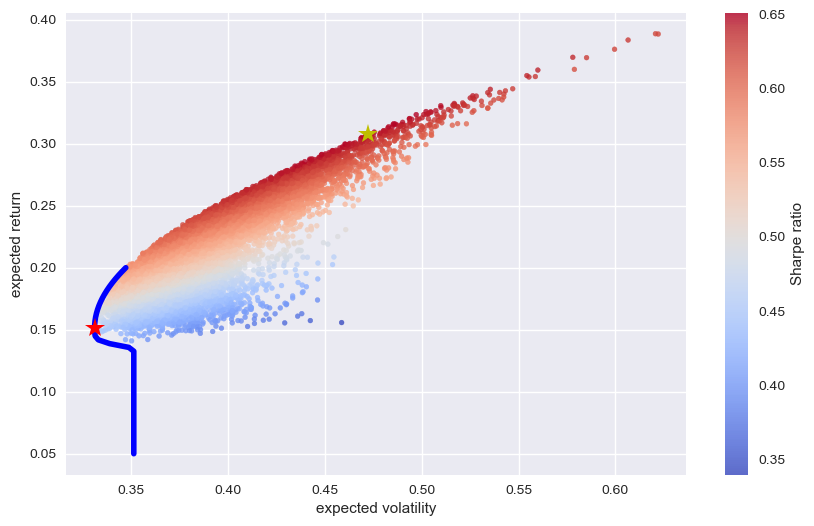

In [259]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## Markowitz efficient

In [ ]:

rets

In [ ]:
plt.figure(figsize=(12.2,4.5)) 
for i in rets.columns.values:
    plt.hist( rets[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(return_assets.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#### CAPM 

# Rentabilidad esperada = Rentab libre de riesgo + beta (Rentabilidad esperada mercado-Rentabilidad libre de riesgo)


# Rentabilidad libre de riesgo = Bono USA a un año 4,66&
# Rentabilidad mercado = SP500 ^GSPC

In [ ]:
benchmark =pdr.get_data_yahoo('^GSPC',start)

In [ ]:
benchmark=benchmark[['Close']]

In [ ]:
rets_bench=np.log(benchmark/benchmark.shift(1)).dropna()

In [ ]:
rets_bench
rets_bench.sum()

In [ ]:
retornos_esperados=expected_returns.capm_return(rets,market_prices=rets_bench,returns_data=True,risk_free_rate=4.5/100,frequency=252)

In [ ]:
retornos_esperados


In [ ]:
df_cov = rets.cov()*252
df_cov

In [ ]:
ef = EfficientFrontier(retornos_esperados, df_cov, weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

In [ ]:
ef1 = EfficientFrontier(retornos_esperados, df_cov, weight_bounds=(0,1))
weights = ef1.efficient_return(0.06,market_neutral=False) 
cleaned_weights1 = ef1.clean_weights() 
print(cleaned_weights1) 
ef1.portfolio_performance(verbose=True)


In [ ]:
ef2 = EfficientFrontier(retornos_esperados, df_cov, weight_bounds=(0,1))
weights = ef2.portfolio_performance(verbose=False, risk_free_rate=0.046) 
cleaned_weights2 = ef2.clean_weights() 
print(cleaned_weights2) 


In [83]:
assets['ep']=assets['ADI']*0.168+assets['MRVL']*0.257+assets['FSLR']*0.575
#return_assets['ep']=(return_assets['CLX']*0.3145+return_assets['CPB']*0.27972+return_assets['CPT']*0.2141+return_assets['RCL']*0.01574+return_assets['USB']*0.17584)

In [102]:
rets

,ADI,FSLR,MDB,MRVL,ep
Date,,,,,
2018-01-03,0.012330,-0.008985,-0.003425,0.030608,0.004771
2018-01-04,-0.001095,-0.009501,-0.003436,0.022463,0.000126
2018-01-05,0.004044,0.000434,0.000000,-0.017669,-0.003612
2018-01-08,0.001744,0.006485,-0.008296,0.007364,0.005914
2018-01-09,-0.002071,0.005729,-0.000694,-0.000864,0.002724
...,...,...,...,...,...
2023-01-27,0.000527,0.022099,0.073047,-0.003159,0.011984
2023-01-30,-0.011185,-0.048963,-0.062633,-0.052424,-0.043506
2023-01-31,0.014924,0.039158,0.017899,0.027251,0.032026


In [103]:
#return_ep = return_assets.loc[:,return_assets.columns=='ep']

In [121]:
S0=rets['ep'].tolist()[0]


In [122]:
S0

0.004771041761886059

In [129]:
mu = rets['ep'].mean()
var = rets['ep'].var()
drift=mu-(0.5*var)
stdev=rets['ep'].std()
n_simulations=6
days=np.arange(252)

In [130]:
epsilon=norm.ppf(np.random.rand(len(days),n_simulations))

In [131]:
return_model = drift + stdev * epsilon
return_model

array([[-0.01904062,  0.02212945,  0.01646758,  0.00538593,  0.01984697,
        -0.01080776],
       [ 0.02101175, -0.01703519,  0.02798672,  0.02201783, -0.02396707,
        -0.00735272],
       [ 0.01345387, -0.06775381, -0.0070206 , -0.01027757, -0.00650448,
        -0.01814466],
       ...,
       [-0.02585246, -0.00702483,  0.0217054 , -0.01865327,  0.02096724,
        -0.01383131],
       [ 0.01109749,  0.01676563, -0.0492264 , -0.00477441, -0.00032637,
        -0.00111259],
       [ 0.01049595,  0.02219506, -0.02022717, -0.02470649,  0.0250579 ,
        -0.01738496]])

In [132]:
S=np.zeros_like(return_model)
S[0]=S0

In [133]:
for t in range(1,len(days)):
    S[t]=S[t-1]*np.exp(return_model[t])

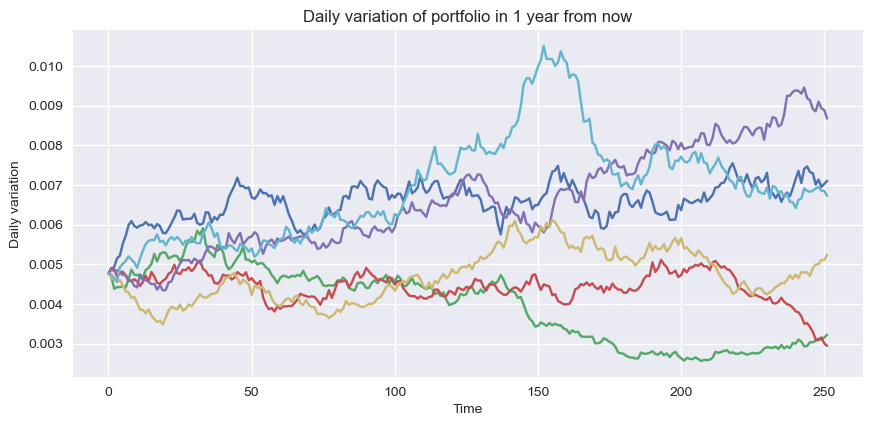

In [141]:
plt.figure(figsize=(10.2,4.5))
plt.plot(S)
plt.title('Daily variation of portfolio in 1 year from now')
plt.xlabel('Time',fontsize=10)
plt.ylabel('Daily variation',fontsize=10)
plt.show()